<a href="https://colab.research.google.com/github/jugginmysleep/pytorchlearning2/blob/main/SimpleNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# create model class that inherits nn.module
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
      super().__init__()
      self.fc1 = nn.Linear(in_features,h1)
      self.fc2 = nn.Linear(h1,h2)
      self.out = nn.Linear(h2,out_features)

    def forward(self,x):
      x=F.relu(self.fc1(x))
      x=F.relu(self.fc2(x))
      x=self.out(x)
      return x

In [3]:
torch.manual_seed(41)
model=Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [11]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [15]:
# train test split set x,y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [16]:
X=X.values
y=y.values

In [17]:
X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [21]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [23]:
# set criterion, measur error
criterion = nn.CrossEntropyLoss()
# choose optimizer (adam)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [34]:
# model training , epochs
epochs = 100
losses = []
for i in range(epochs):
  # forward get prediction
  y_pred = model.forward(X_train)
  # measure loss
  loss = criterion(y_pred, y_train)
  # keep track of losses
  losses.append(loss.detach().numpy())
  # print every 10 epochs
  if i % 10 == 0:
    print(f'epoch:{i} and loss: {loss}')
  # back propogation whatever taht means
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:0 and loss: 0.0005068883183412254
epoch:10 and loss: 0.000495979911647737
epoch:20 and loss: 0.0004853857681155205
epoch:30 and loss: 0.00047508382704108953
epoch:40 and loss: 0.0004650850605685264
epoch:50 and loss: 0.0004553596372716129
epoch:60 and loss: 0.0004459017072804272
epoch:70 and loss: 0.0004367191868368536
epoch:80 and loss: 0.0004277867847122252
epoch:90 and loss: 0.0004190930922050029


Text(0.5, 0, 'epoch')

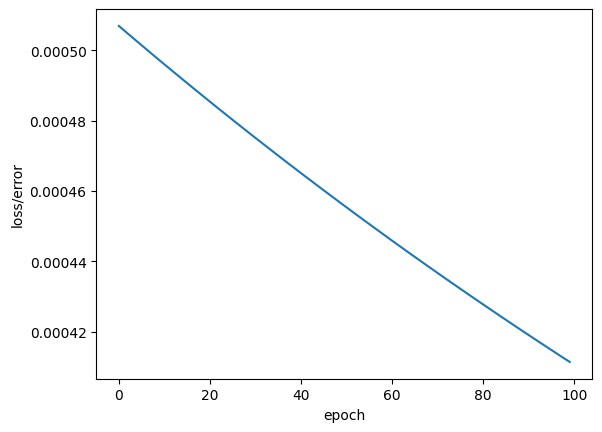

In [35]:
# graph time
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('epoch')

In [ ]:
# finish tmrw